STEP 1: Installing Required Libraries

✓ All libraries imported successfully!

STEP 2: Loading Telco Churn Dataset

✓ Dataset loaded successfully!
Shape: (7043, 21)

First 5 rows:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4   

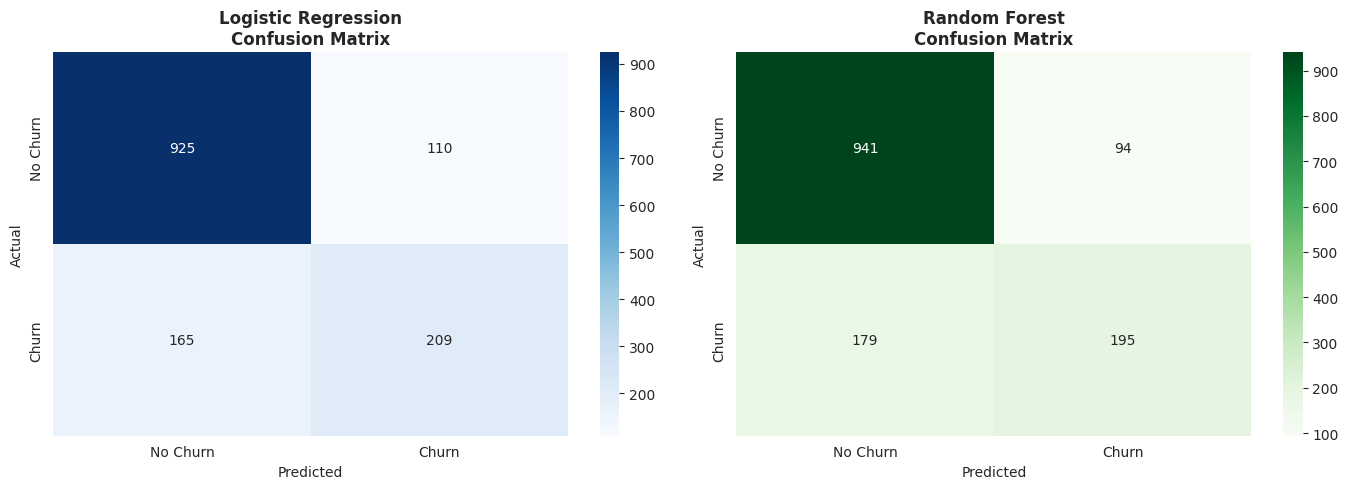

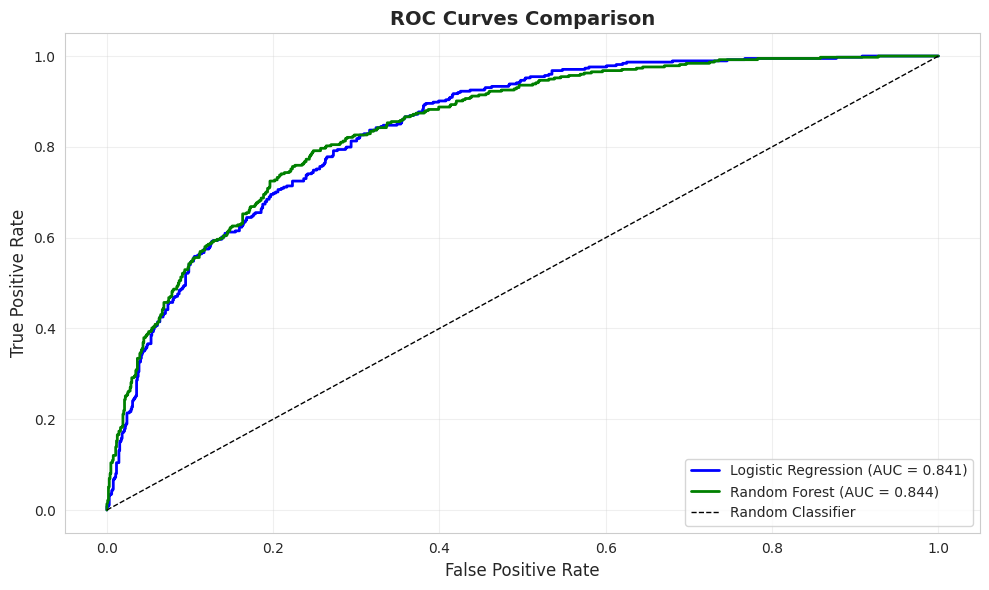


✓ Visualizations created!

STEP 13: Exporting Models

Best Model: Random Forest
ROC-AUC: 0.8437

✓ Models exported successfully!
   • best_churn_model.pkl
   • logistic_regression_model.pkl
   • random_forest_model.pkl
   • preprocessor.pkl

STEP 14: Testing Saved Model

✓ Model loaded successfully!

Sample Predictions:
 Actual  Predicted  Churn_Prob
      0          0      0.0113
      0          1      0.7266
      0          0      0.0557
      0          0      0.3347
      0          0      0.0271

STEP 15: Production-Ready Prediction Function

Testing prediction function:
 Churn_Prediction Churn_Risk  Churn_Probability
                0        Low             0.0113
                1       High             0.7266
                0        Low             0.0557
                0        Low             0.3347
                0        Low             0.0271
                1     Medium             0.5549
                0        Low             0.3523
                0        Low  

In [1]:
"""
END-TO-END ML PIPELINE FOR TELCO CUSTOMER CHURN PREDICTION
===========================================================

This script demonstrates a production-ready ML pipeline using scikit-learn.

INSTRUCTIONS FOR GOOGLE COLAB:
1. Go to https://colab.research.google.com/
2. Click "New Notebook"
3. Copy-paste this entire script into a cell
4. Run the cell (Shift + Enter)
5. Follow the step-by-step execution

Author: ML Pipeline Tutorial
Date: January 2026
"""

# ============================================================================
# STEP 1: INSTALL AND IMPORT LIBRARIES
# ============================================================================

print("="*80)
print("STEP 1: Installing Required Libraries")
print("="*80)

# Install packages (uncomment if needed)
# !pip install scikit-learn pandas numpy matplotlib seaborn joblib --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')

# Scikit-learn imports
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    roc_curve, accuracy_score, precision_score, recall_score, f1_score
)

# Set random seed
np.random.seed(42)
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')

print("\n✓ All libraries imported successfully!\n")

# ============================================================================
# STEP 2: LOAD DATASET
# ============================================================================

print("="*80)
print("STEP 2: Loading Telco Churn Dataset")
print("="*80)

url = 'https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv'

df = pd.read_csv(url)

print(f"\n✓ Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"\nFirst 5 rows:")
print(df.head())

print("\n" + "="*80)
print("Dataset Info:")
print("="*80)
df.info()

# ============================================================================
# STEP 3: DATA PREPROCESSING
# ============================================================================

print("\n" + "="*80)
print("STEP 3: Data Preprocessing")
print("="*80)

# Drop customerID
df_clean = df.drop('customerID', axis=1)

# Convert TotalCharges to numeric
df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'], errors='coerce')
df_clean['TotalCharges'].fillna(0, inplace=True)

# Convert target to binary
df_clean['Churn'] = df_clean['Churn'].map({'Yes': 1, 'No': 0})

print(f"\n✓ Data cleaning completed!")
print(f"Final shape: {df_clean.shape}")

# Check target distribution
print("\nTarget Distribution:")
print(df_clean['Churn'].value_counts())
print(f"\nChurn Rate: {df_clean['Churn'].mean():.2%}")

# ============================================================================
# STEP 4: DEFINE FEATURES
# ============================================================================

print("\n" + "="*80)
print("STEP 4: Defining Features")
print("="*80)

# Numerical features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Categorical features
categorical_features = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

print(f"\nNumerical features ({len(numerical_features)}): {numerical_features}")
print(f"\nCategorical features ({len(categorical_features)}): {len(categorical_features)} features")

# ============================================================================
# STEP 5: TRAIN-TEST SPLIT
# ============================================================================

print("\n" + "="*80)
print("STEP 5: Splitting Data")
print("="*80)

X = df_clean.drop('Churn', axis=1)
y = df_clean['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"\nTraining churn rate: {y_train.mean():.2%}")
print(f"Testing churn rate: {y_test.mean():.2%}")

# ============================================================================
# STEP 6: BUILD PREPROCESSING PIPELINE
# ============================================================================

print("\n" + "="*80)
print("STEP 6: Building Preprocessing Pipeline")
print("="*80)

# Numerical pipeline
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical pipeline
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ],
    remainder='drop'
)

print("\n✓ Preprocessing pipeline created!")

# ============================================================================
# STEP 7: CREATE ML PIPELINES
# ============================================================================

print("\n" + "="*80)
print("STEP 7: Creating ML Pipelines")
print("="*80)

# Logistic Regression Pipeline
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

# Random Forest Pipeline
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

print("\n✓ ML Pipelines created!")
print("   1. Logistic Regression Pipeline")
print("   2. Random Forest Pipeline")

# ============================================================================
# STEP 8: TRAIN BASELINE MODELS
# ============================================================================

print("\n" + "="*80)
print("STEP 8: Training Baseline Models")
print("="*80)

print("\nTraining Logistic Regression...")
lr_pipeline.fit(X_train, y_train)
lr_pred = lr_pipeline.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
print(f"✓ LR Accuracy: {lr_accuracy:.4f}")

print("\nTraining Random Forest...")
rf_pipeline.fit(X_train, y_train)
rf_pred = rf_pipeline.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"✓ RF Accuracy: {rf_accuracy:.4f}")

# ============================================================================
# STEP 9: HYPERPARAMETER TUNING WITH GRIDSEARCHCV
# ============================================================================

print("\n" + "="*80)
print("STEP 9: Hyperparameter Tuning with GridSearchCV")
print("="*80)
print("\n⏳ This will take 5-10 minutes. Please wait...")

# Logistic Regression parameters
lr_param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__penalty': ['l2'],
    'classifier__solver': ['lbfgs', 'liblinear']
}

# Random Forest parameters
rf_param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# GridSearchCV for Logistic Regression
print("\n1. Tuning Logistic Regression...")
lr_grid = GridSearchCV(
    lr_pipeline,
    param_grid=lr_param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)
lr_grid.fit(X_train, y_train)

print(f"\n✓ LR Tuning completed!")
print(f"Best parameters: {lr_grid.best_params_}")
print(f"Best CV ROC-AUC: {lr_grid.best_score_:.4f}")

# GridSearchCV for Random Forest
print("\n2. Tuning Random Forest...")
rf_grid = GridSearchCV(
    rf_pipeline,
    param_grid=rf_param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)
rf_grid.fit(X_train, y_train)

print(f"\n✓ RF Tuning completed!")
print(f"Best parameters: {rf_grid.best_params_}")
print(f"Best CV ROC-AUC: {rf_grid.best_score_:.4f}")

# ============================================================================
# STEP 10: EVALUATE TUNED MODELS
# ============================================================================

print("\n" + "="*80)
print("STEP 10: Evaluating Tuned Models")
print("="*80)

# Function to evaluate model
def evaluate_model(y_true, y_pred, y_proba, model_name):
    print(f"\n{model_name} Evaluation:")
    print("-" * 60)

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_proba)

    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    print(f"ROC-AUC:   {roc_auc:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=['No Churn', 'Churn']))

    return accuracy, precision, recall, f1, roc_auc

# Evaluate LR
lr_tuned_pred = lr_grid.predict(X_test)
lr_tuned_proba = lr_grid.predict_proba(X_test)[:, 1]
lr_metrics = evaluate_model(y_test, lr_tuned_pred, lr_tuned_proba, "Tuned Logistic Regression")

# Evaluate RF
rf_tuned_pred = rf_grid.predict(X_test)
rf_tuned_proba = rf_grid.predict_proba(X_test)[:, 1]
rf_metrics = evaluate_model(y_test, rf_tuned_pred, rf_tuned_proba, "Tuned Random Forest")

# ============================================================================
# STEP 11: MODEL COMPARISON
# ============================================================================

print("\n" + "="*80)
print("STEP 11: Model Comparison")
print("="*80)

comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [lr_metrics[0], rf_metrics[0]],
    'Precision': [lr_metrics[1], rf_metrics[1]],
    'Recall': [lr_metrics[2], rf_metrics[2]],
    'F1-Score': [lr_metrics[3], rf_metrics[3]],
    'ROC-AUC': [lr_metrics[4], rf_metrics[4]]
})

print("\n")
print(comparison_df.to_string(index=False))

# ============================================================================
# STEP 12: VISUALIZATIONS
# ============================================================================

print("\n" + "="*80)
print("STEP 12: Creating Visualizations")
print("="*80)

# Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

cm_lr = confusion_matrix(y_test, lr_tuned_pred)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
axes[0].set_title('Logistic Regression\nConfusion Matrix', fontweight='bold')
axes[0].set_ylabel('Actual')
axes[0].set_xlabel('Predicted')

cm_rf = confusion_matrix(y_test, rf_tuned_pred)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
axes[1].set_title('Random Forest\nConfusion Matrix', fontweight='bold')
axes[1].set_ylabel('Actual')
axes[1].set_xlabel('Predicted')

plt.tight_layout()
plt.show()

# ROC Curves
fig, ax = plt.subplots(figsize=(10, 6))

fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_tuned_proba)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_tuned_proba)

ax.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {lr_metrics[4]:.3f})',
        linewidth=2, color='blue')
ax.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {rf_metrics[4]:.3f})',
        linewidth=2, color='green')
ax.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')

ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_ylabel('True Positive Rate', fontsize=12)
ax.set_title('ROC Curves Comparison', fontsize=14, fontweight='bold')
ax.legend(loc='lower right')
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Visualizations created!")

# ============================================================================
# STEP 13: EXPORT MODELS
# ============================================================================

print("\n" + "="*80)
print("STEP 13: Exporting Models")
print("="*80)

# Select best model
if rf_metrics[4] > lr_metrics[4]:
    best_model = rf_grid.best_estimator_
    best_model_name = 'Random Forest'
    best_score = rf_metrics[4]
else:
    best_model = lr_grid.best_estimator_
    best_model_name = 'Logistic Regression'
    best_score = lr_metrics[4]

print(f"\nBest Model: {best_model_name}")
print(f"ROC-AUC: {best_score:.4f}")

# Save models
joblib.dump(best_model, 'best_churn_model.pkl')
joblib.dump(lr_grid.best_estimator_, 'logistic_regression_model.pkl')
joblib.dump(rf_grid.best_estimator_, 'random_forest_model.pkl')
joblib.dump(preprocessor, 'preprocessor.pkl')

print("\n✓ Models exported successfully!")
print("   • best_churn_model.pkl")
print("   • logistic_regression_model.pkl")
print("   • random_forest_model.pkl")
print("   • preprocessor.pkl")

# ============================================================================
# STEP 14: TEST SAVED MODEL
# ============================================================================

print("\n" + "="*80)
print("STEP 14: Testing Saved Model")
print("="*80)

# Load model
loaded_model = joblib.load('best_churn_model.pkl')
print("\n✓ Model loaded successfully!")

# Make predictions
sample_pred = loaded_model.predict(X_test.head(5))
sample_proba = loaded_model.predict_proba(X_test.head(5))

results = pd.DataFrame({
    'Actual': y_test.head(5).values,
    'Predicted': sample_pred,
    'Churn_Prob': sample_proba[:, 1].round(4)
})

print("\nSample Predictions:")
print(results.to_string(index=False))

# ============================================================================
# STEP 15: PRODUCTION FUNCTION
# ============================================================================

print("\n" + "="*80)
print("STEP 15: Production-Ready Prediction Function")
print("="*80)

def predict_churn(customer_data, model_path='best_churn_model.pkl'):
    """
    Predict customer churn for new data

    Parameters:
    -----------
    customer_data : pd.DataFrame
        Customer features
    model_path : str
        Path to saved model

    Returns:
    --------
    pd.DataFrame with predictions
    """
    model = joblib.load(model_path)
    predictions = model.predict(customer_data)
    probabilities = model.predict_proba(customer_data)

    results = pd.DataFrame({
        'Churn_Prediction': predictions,
        'Churn_Risk': ['High' if p > 0.7 else 'Medium' if p > 0.4 else 'Low'
                       for p in probabilities[:, 1]],
        'Churn_Probability': probabilities[:, 1].round(4)
    })

    return results

# Test function
print("\nTesting prediction function:")
test_results = predict_churn(X_test.head(10))
print(test_results.to_string(index=False))

# ============================================================================
# FINAL SUMMARY
# ============================================================================

print("\n" + "="*80)
print("FINAL SUMMARY")
print("="*80)

print(f"\n📊 Dataset: {len(df)} samples, {df.shape[1]} features")
print(f"📈 Churn Rate: {y.mean():.2%}")
print(f"\n🏆 Best Model: {best_model_name}")
print(f"🎯 ROC-AUC Score: {best_score:.4f}")

print("\n✅ Skills Gained:")
print("   1. ML Pipeline construction")
print("   2. ColumnTransformer for mixed features")
print("   3. GridSearchCV for hyperparameter tuning")
print("   4. Model evaluation and comparison")
print("   5. Model export with joblib")
print("   6. Production-ready functions")

print("\n💾 Exported Files:")
print("   • best_churn_model.pkl")
print("   • logistic_regression_model.pkl")
print("   • random_forest_model.pkl")
print("   • preprocessor.pkl")

print("\n" + "="*80)
print("🎉 CONGRATULATIONS! ML Pipeline Project Completed Successfully!")
print("="*80)